## Read Data
Each datapoint has an index, 9 personality descriptors and 100 Twitter variables

(Named panda datafram as df by convention)

In [154]:
import pandas as pd
df = pd.read_csv("PersonalityData_ExternalVersion001.csv")
df

,uid,psychopathy,machiavellianism,narcissism,openness,conscientiousness,extraversion,agreeableness,neuroticism,Var1,...,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100
0,1,2.444444,3.4,3.444444,7.0,6.0,5.5,3.5,3.5,48.59,...,4.86,1.31,2.05,0.66,0.92,1.14,4.37,0.71,15.11,45.70
1,2,1.888889,2.4,2.777778,7.0,4.5,6.0,3.0,5.5,41.29,...,8.28,0.04,0.46,2.34,2.99,0.38,1.46,2.83,21.90,53.49
2,3,1.111111,3.0,3.444444,5.5,6.0,6.0,6.5,3.0,14.65,...,3.07,0.20,2.63,1.72,0.64,0.42,2.74,0.11,10.13,32.77
3,4,1.888889,3.0,2.444444,5.0,3.5,2.0,6.5,1.5,17.60,...,1.65,0.16,1.43,2.42,1.07,1.67,3.46,0.35,5.65,32.67
4,5,2.111111,3.1,1.333333,6.0,5.5,2.5,5.5,5.0,52.63,...,1.12,0.08,1.14,0.38,0.85,1.05,4.67,0.38,8.34,34.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2923,2.000000,2.4,3.222222,6.0,6.5,3.0,3.5,4.5,10.13,...,4.19,0.00,2.99,0.00,1.80,0.00,3.59,0.00,14.37,37.72
2923,2924,1.333333,3.0,2.444444,6.0,4.5,7.0,6.5,1.0,10.06,...,2.86,0.00,2.86,0.00,1.90,0.00,2.86,0.00,12.38,31.43
2924,2925,2.777778,3.6,3.666667,3.5,2.5,3.5,5.0,5.5,10.00,...,10.43,0.87,0.00,4.35,0.00,0.00,0.87,0.00,19.13,59.13
2925,2926,1.555556,2.9,3.777778,4.0,6.5,4.0,2.5,4.0,27.79,...,3.51,0.25,3.84,11.27,0.17,0.58,1.34,0.08,12.69,42.90


Index(['uid', 'psychopathy', 'machiavellianism', 'narcissism', 'openness',
       'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism',
       'Var1',
       ...
       'Var91', 'Var92', 'Var93', 'Var94', 'Var95', 'Var96', 'Var97', 'Var98',
       'Var99', 'Var100'],
      dtype='object', length=109)


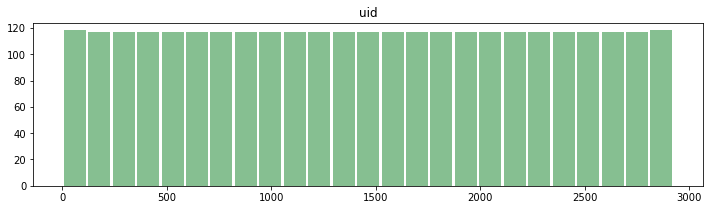

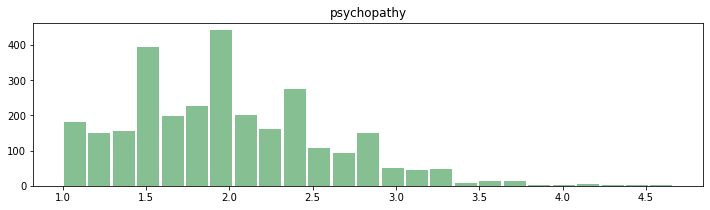

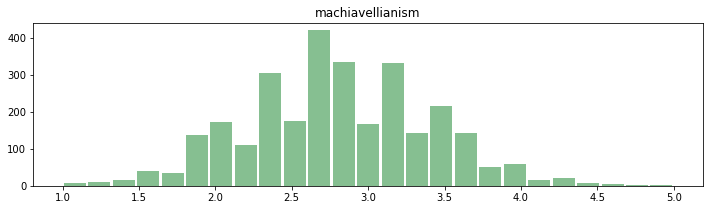

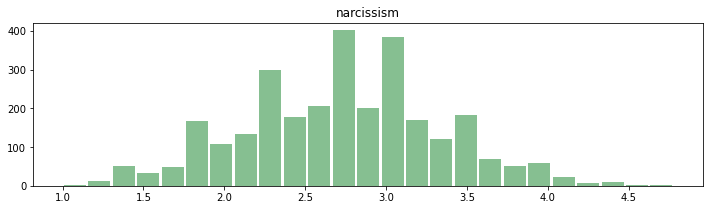

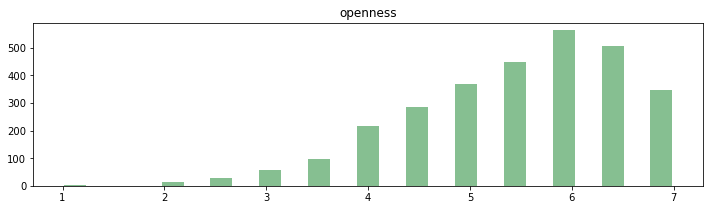

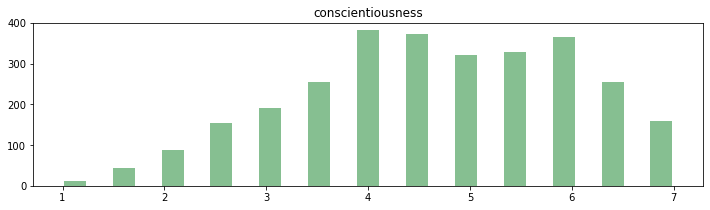

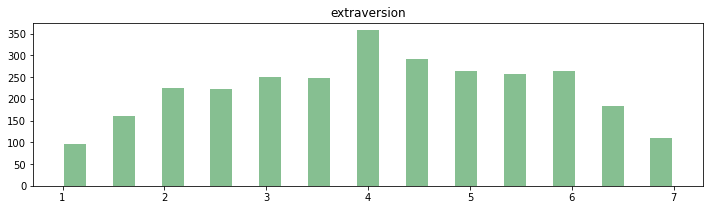

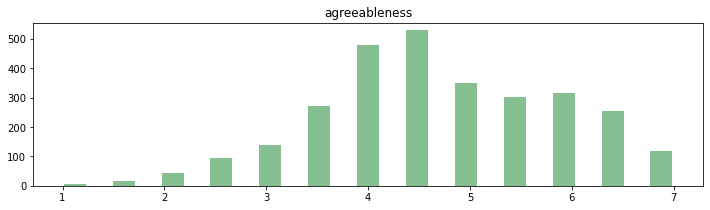

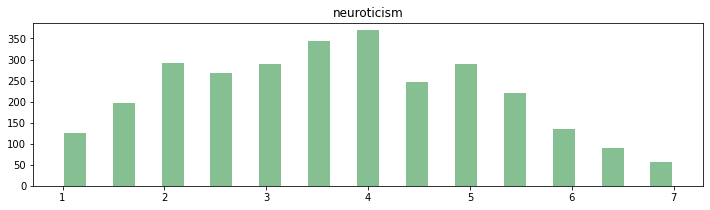

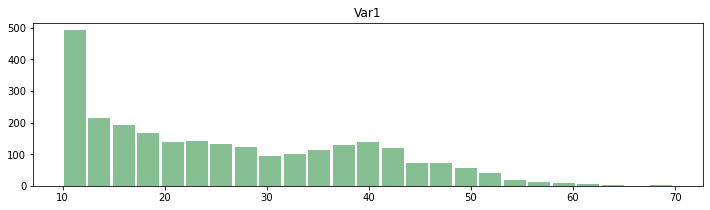

In [159]:
#print(df.columns)
for col in df.columns[:10]:
    try:
        ax=df.hist(column=col, bins=25, grid=False, figsize=(12,3), color='#86bf91', zorder=2, rwidth=0.9)
    except Exception:
        continue

## Psychopathy Cutoff

The model should aim to identify people scoring high in Psychopathy, for the purpose of this competition, defined as 2 SD's above a mean of 1.98. This accounts for roughly 3% of the entire sample and therefore the challenge with this dataset is developing a model to work with a highly imbalanced dataset.

In [196]:
av=df['psychopathy'].mean()
std=df['psychopathy'].std()
psychopath_cutoff=av+2*std
df_cutoff=df[df['psychopathy']>psychopath_cutoff]

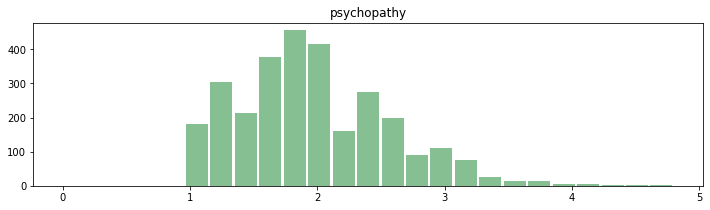

In [197]:
ax=df.hist(column='psychopathy', bins=25, grid=False, figsize=(12,3), color='#86bf91', zorder=2, rwidth=0.9,range=[0,4.8])

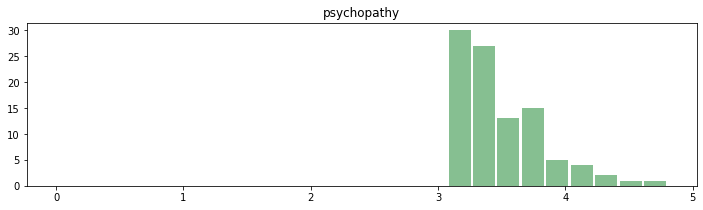

In [198]:
ax=df_cutoff.hist(column='psychopathy',bins=25, grid=False, figsize=(12,3), 
                  color='#86bf91', zorder=2, rwidth=0.9,range=[0,4.8])
